<a href="https://colab.research.google.com/github/simsekergun/DATA601/blob/main/Lecture09_Statistics1/Fundamentals_of_Statistics_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from random import randint

## Introduction to Linear Regression
Assume that we have a simple dataset with $N$ pairs of $x$ and $y$ values, e.g.

$$(x_0, y_0), (x_1, y_1), \cdots ,(x_N, y_N) $$

We want to formulate a linear model to describe the relationship between $x$ and $y$. The linear model can be express as:

$$y = \beta_0 + \beta_1 x$$

For a linear function, $\beta_0$ is the intercept, and $\beta_1$ is the slope. These are two parameters that we want to estimate.

In [2]:
# let's load a sample dataset
# gvh = pd.read_csv("grade_vs_no_of_hours.csv")
gvh = pd.read_csv("https://raw.githubusercontent.com/simsekergun/DATA601/main/Datasets/grade_vs_no_of_hours.csv")
gvh.head()

,grade,no_of_hours
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


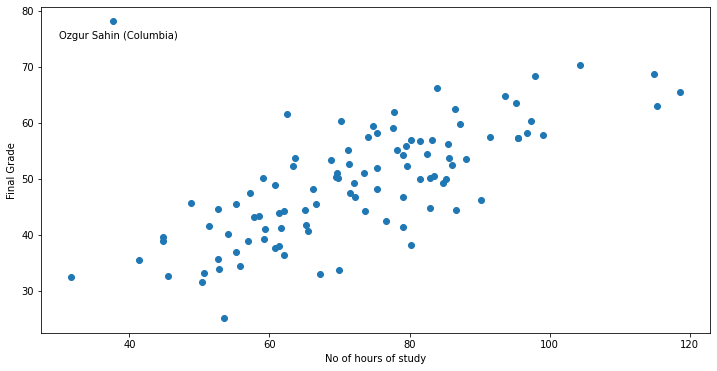

In [3]:
# Let's see what we have
fig = plt.figure(figsize=(12,6))
plt.scatter(gvh.no_of_hours, gvh.grade)
plt.xlabel('No of hours of study')
plt.ylabel('Final Grade')
plt.text(30,75,'Ozgur Sahin (Columbia)')
plt.show()

Numpy has a <code>polyfit</code> function which can determine $\beta_0$ and $\beta_1$ for us. Later we'll learn how we calculate them.

https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html


In [4]:
Lin_Reg_Coefficients = np.polyfit(gvh.no_of_hours, gvh.grade, 1)
Lin_Reg_Coefficients

array([ 0.3980811 , 20.43090502])

In [5]:
x = np.arange(30,160)
y_prediction = Lin_Reg_Coefficients[0]*x+Lin_Reg_Coefficients[1]

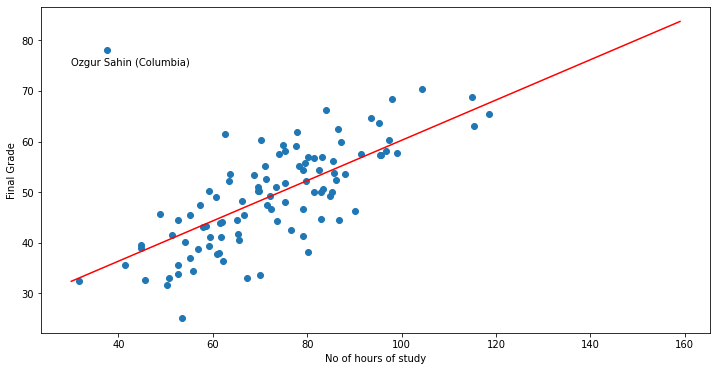

In [6]:
fig = plt.figure(figsize=(12,6))
plt.scatter(gvh.no_of_hours, gvh.grade)
plt.plot(x,y_prediction,'r')
plt.xlabel('No of hours of study')
plt.ylabel('Final Grade')
plt.text(30,75,'Ozgur Sahin (Columbia)')
plt.show()

#### Questions
- Can we guess the grade of a student who works for 160 hours in total?
- Do you see a problem (hint what if the student works for 1600 hours??)

In [7]:
x_guess = 160
y_guess = Lin_Reg_Coefficients[0]*x_guess+Lin_Reg_Coefficients[1]
print(y_guess)

84.12388093958388


In [8]:
x_guess = 1600
y_guess = Lin_Reg_Coefficients[0]*x_guess+Lin_Reg_Coefficients[1]
print(y_guess)

657.3606641915338


#### Comment:
Linear regression is very useful and powerful but there are certain limits where it could be applied. <br>

We heavily use statistics to determine these limits. <br>

### Descriptive vs. Inferential Statistics
 - <b>Descriptive:</b> describes data you have but can't be generalized beyond that (e.g. median)
 - <b>Inferential: </b> enables inferences about the population beyond our data (e.g. t-test)


We'll talk about these in detail later. At this moment, let's look at the following example after learning about Dr. John Tukey.

## John Tukey
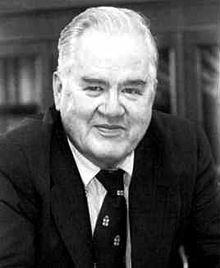

 - Co-inventor FFT
 - Created techniques for visualizing and summarizing data
  - 5-number summary, box plots, stem and leaf diagrams,…
 - Author of the famous EDA book (1977)
 - What can the data tell us? (in contrast to “confirmatory” data analysis) <br>
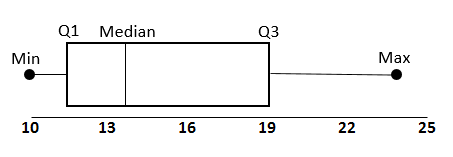



### Anscombe's Quarted
This famous dataset was created by statistician Francis Anscombe in 1973. There are four groups each consisting of 11 pairs of x and y coordinates.

In [9]:
# anscombe = pd.read_csv("anscombes.csv")
anscombe = pd.read_csv("https://raw.githubusercontent.com/simsekergun/DATA601/main/Datasets/anscombes.csv")
anscombe

,xA,yA,xB,yB,xC,yC,xD,yD
0,10,8.04,10,9.14,10,7.46,8,6.58
1,8,6.95,8,8.14,8,6.77,8,5.76
2,13,7.58,13,8.74,13,12.74,8,7.71
3,9,8.81,9,8.77,9,7.11,8,8.84
4,11,8.33,11,9.26,11,7.81,8,8.47
5,14,9.96,14,8.10,14,8.84,8,7.04
6,6,7.24,6,6.13,6,6.08,8,5.25
7,4,4.26,4,3.10,4,5.39,19,12.50
8,12,10.84,12,9.13,12,8.15,8,5.56
9,7,4.82,7,7.26,7,6.42,8,7.91


(3.0, 13.0)

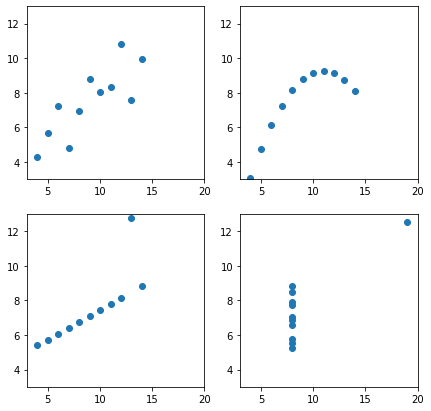

In [10]:
fig = plt.figure(figsize=(7,7))

ax1 = fig.add_subplot(221)
ax1.scatter(anscombe.xA, anscombe.yA)
ax1.set_xlim(3,20)
ax1.set_ylim(3,13)

ax2 = fig.add_subplot(222)
ax2.scatter(anscombe.xB, anscombe.yB)
ax2.set_xlim(3,20)
ax2.set_ylim(3,13)

ax3 = fig.add_subplot(223)
ax3.scatter(anscombe.xC, anscombe.yC)
ax3.set_xlim(3,20)
ax3.set_ylim(3,13)

ax4 = fig.add_subplot(224)
ax4.scatter(anscombe.xD, anscombe.yD)
ax4.set_xlim(3,20)
ax4.set_ylim(3,13)

It looks like these four groups have almost nothing in common! <br>
Let's try to fit them with Linear Regression

In [11]:
zA = np.polyfit(x=anscombe.xA, y=anscombe.yA, deg=1)
zB = np.polyfit(x=anscombe.xB, y=anscombe.yB, deg=1)
zC = np.polyfit(x=anscombe.xC, y=anscombe.yC, deg=1)
zD = np.polyfit(x=anscombe.xD, y=anscombe.yD, deg=1)

In [12]:
x = np.arange(0,21)
fxA = zA[0]*x+zA[1]
fxB = zB[0]*x+zB[1]
# fxB = zB[0]*x*x*x+zB[1]*x*x+zB[2]*x+zB[3]
fxC = zC[0]*x+zC[1]
fxD = zD[0]*x+zD[1]

(3.0, 13.0)

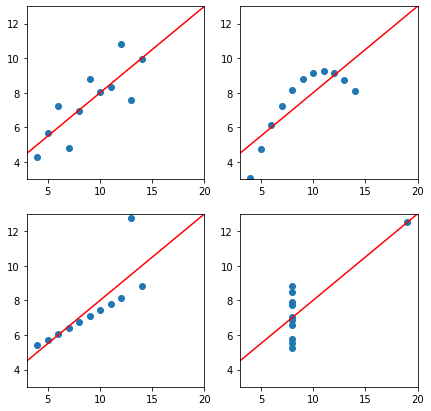

In [13]:
fig = plt.figure(figsize=(7,7))

ax1 = fig.add_subplot(221)
ax1.scatter(anscombe.xA, anscombe.yA)
ax1.plot(x, fxA,'r')
ax1.set_xlim(3,20)
ax1.set_ylim(3,13)

ax2 = fig.add_subplot(222)
ax2.scatter(anscombe.xB, anscombe.yB)
ax2.plot(x, fxB,'r')
ax2.set_xlim(3,20)
ax2.set_ylim(3,13)

ax3 = fig.add_subplot(223)
ax3.scatter(anscombe.xC, anscombe.yC)
ax3.plot(x, fxC,'r')
ax3.set_xlim(3,20)
ax3.set_ylim(3,13)

ax4 = fig.add_subplot(224)
ax4.scatter(anscombe.xD, anscombe.yD)
ax4.plot(x, fxD,'r')
ax4.set_xlim(3,20)
ax4.set_ylim(3,13)

Even though these four groups look quite different, we ended up using the same linear regression model to make predictions. This was a simple case where we could determine the issue visually but when there are tens of variables, things will get complicated. We really need to understand distributions, how to characterize them, and how to transform them (when needed).

## DISTRIBUTIONS and BASIC STATS

In [14]:
# df = pd.read_csv('distributions.csv')
df = pd.read_csv('https://raw.githubusercontent.com/simsekergun/DATA601/main/Datasets/distributions.csv')
df.head(5)

,age,weight,income,year_of_experience,married
0,44,76,173350,11,1.0
1,49,77,97150,4,1.0
2,61,69,194300,14,1.0
3,67,65,251200,20,1.0
4,47,66,231750,17,1.0


In [15]:
df.shape

(20000, 5)

In [16]:
df.describe()

,age,weight,income,year_of_experience,married
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000
mean,42.486450,69.946300,155205.550000,9.51785,0.470400
std,14.393689,4.992731,45087.367102,4.46607,0.499136
min,18.000000,53.000000,49450.000000,0.00000,0.000000
25%,30.000000,66.000000,122400.000000,6.00000,0.000000
50%,42.000000,70.000000,149000.000000,9.00000,0.000000
75%,55.000000,73.000000,181400.000000,12.00000,1.000000
max,67.000000,91.000000,447950.000000,38.00000,1.000000


Dataframe's boxplot
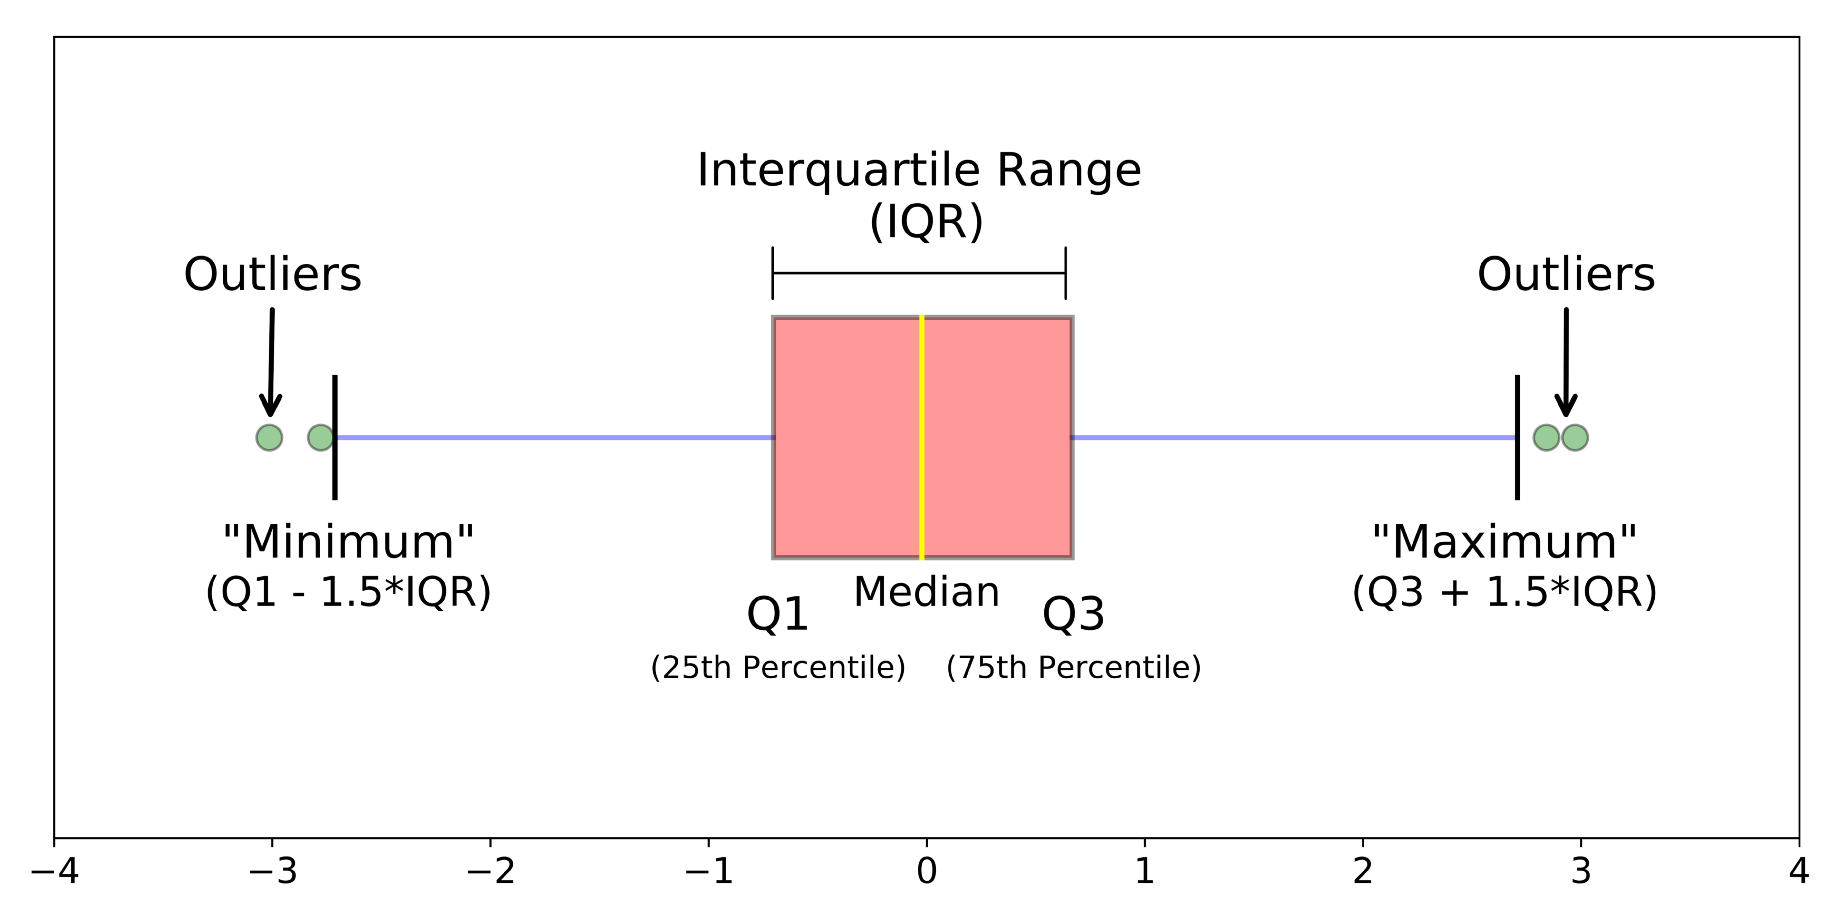

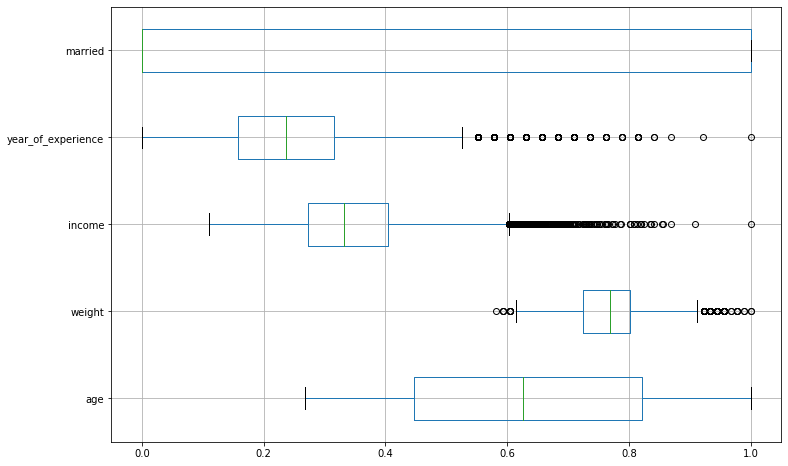

In [17]:
# normalize each column to have an idea of distributions 
dfnormalized = df/df.max()
dfnormalized.boxplot(vert=False, figsize=(12,8))

## DISTRIBUTIONS
### BINOMIAL
The two outcomes are identified as A and B, with probabilities of p(A) = p and p(B) = q. 

How many times, we get “A” if we do N experiments


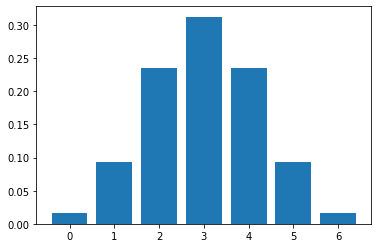

In [18]:
from scipy.stats import binom
import matplotlib.pyplot as plt
n = 6
p = 0.5
# defining list of r values
r_values = list(range(n + 1))
# list of pmf values
dist = [binom.pmf(r, n, p) for r in r_values ]
# plotting the graph 
plt.bar(r_values, dist)
plt.show()

### Poisson

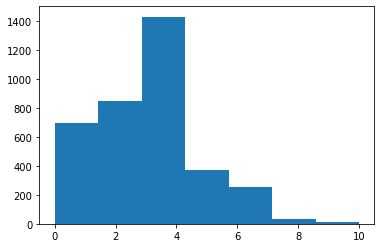

In [19]:
s1 = np.random.poisson(3, 365*10)
count, bins, ignored = plt.hist(s1, 7, density=False)
plt.show()

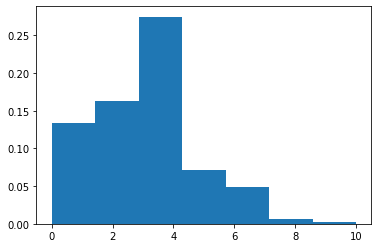

In [20]:
# s1 = np.random.poisson(3, 365*10)
count, bins, ignored = plt.hist(s1, 7, density=True)
plt.show()

### Rayleigh

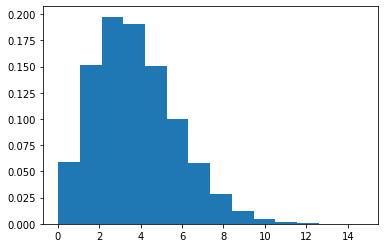

In [21]:
s2 = np.random.rayleigh(3, 100000)
count, bins, ignored = plt.hist(s2, 14, density=True)
plt.show()

### Gamma
Example: Times to failure of electronic components


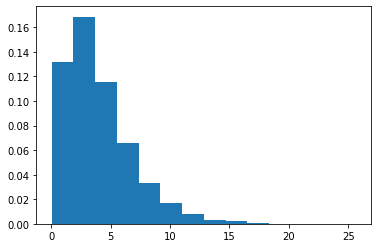

In [22]:
s5 = np.random.gamma(2, 2, 10000)
count, bins, ignored = plt.hist(s5, 14, density=True)
plt.show()

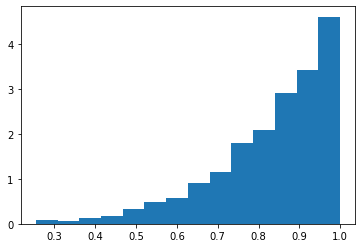

In [23]:
s3 = np.random.power(5, 1000)
count, bins, ignored = plt.hist(s3, 14, density=True)
plt.show()

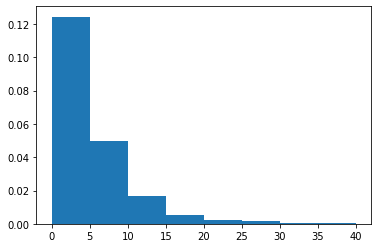

In [24]:
s4 = np.random.exponential(5, 1000)
count, bins, ignored = plt.hist(s4, bins=np.arange(0,45,5), density=True)
plt.show()

## TRANSFORMATION with BOX-COX

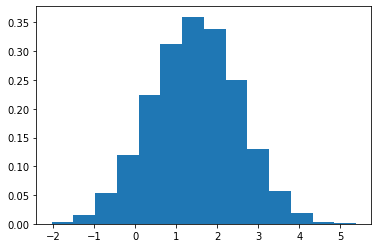

In [25]:
s5transformed, lmbd = stats.boxcox(s5)
count, bins, ignored = plt.hist(s5transformed, 14, density=True)
plt.show()

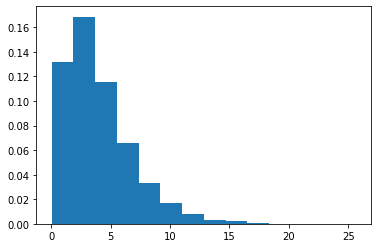

In [26]:
from scipy.special import boxcox, inv_boxcox
s5inverted = inv_boxcox(s5transformed, lmbd)
count, bins, ignored = plt.hist(s5inverted, 14, density=True)
plt.show()

## Central Limit Theorem in Action
Let's say we have a exponentially distributed data (population)

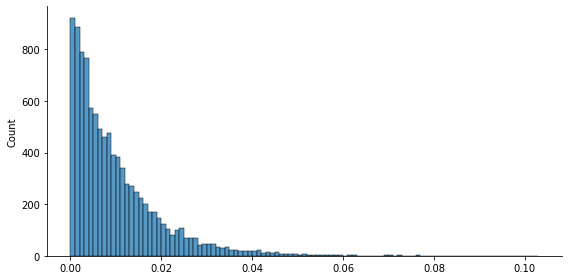

In [27]:
population = np.random.exponential(0.01, 10000)
plot = sns.displot(x = population , kind='hist', height = 4, aspect = 2)

Let's say we randomly chose *N* samples and we calculate their mean. <br>
Then we take another randomly chosen group of *N* samples and we calculate their mean.  <br>
Then we just repeat. Let's say *M* is the total number of these random group selection and mean calculation. <br>

According to the Central Limit theorem, the "means" we have calculated is normally distributed for large *M* no matter what *N* is (assuming *N* is not so small!). 

In [28]:
def random_samples(population, sample_qty, sample_size):
    sample_means = []
    for i in range(sample_qty):
        sample = population.sample(n=sample_size)
        sample_mean = np.array(sample).mean()
        sample_means.append(sample_mean)
    return sample_means

N = 50 <br>
M = 5

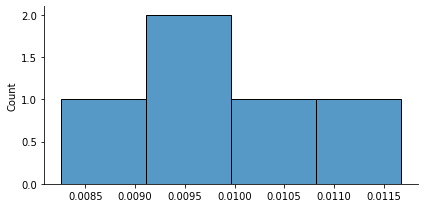

In [29]:
population_dataframe = pd.Series(population)
samples_from_normal = random_samples(population_dataframe, 5, 50)
plot = sns.displot(samples_from_normal, kind='hist', height = 3, aspect = 2)

N = 50 <br>
M = 50

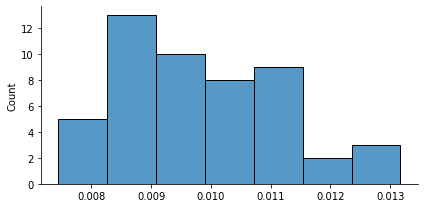

In [30]:
samples_from_normal = random_samples(population_dataframe, 50, 50)
plot = sns.displot(samples_from_normal, kind='hist', height = 3, aspect = 2)

N = 50 <br>
M = 500

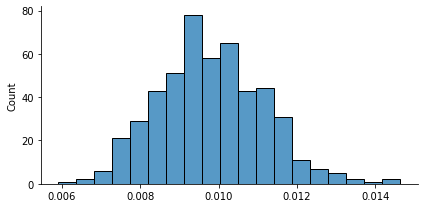

In [31]:
samples_from_normal = random_samples(population_dataframe, 500, 50)
plot = sns.displot(samples_from_normal, kind='hist', height = 3, aspect = 2)

But if we choose a ridiciously small *N*, then it won't work. For example, <br>
N = 2 <br>
M = 5000

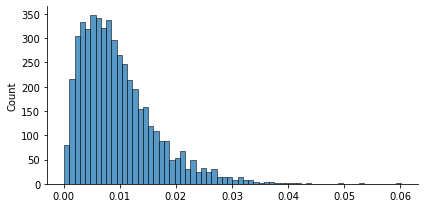

In [32]:
samples_from_normal = random_samples(population_dataframe, 5000, 2)
plot = sns.displot(samples_from_normal, kind='hist', height = 3, aspect = 2)

## Outlier Detection with z-Score

In [33]:
# Let's read our "Grade vs No of Hours" dataset again
gvh = pd.read_csv("https://raw.githubusercontent.com/simsekergun/DATA601/main/Datasets/grade_vs_no_of_hours.csv")
gvh.head()

,grade,no_of_hours
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


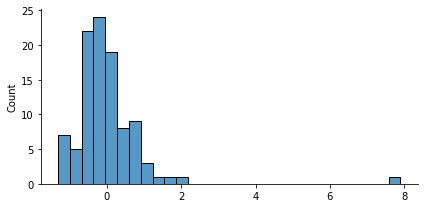

In [34]:
grade_normalized_by_hour = gvh.iloc[:,0].values/gvh.iloc[:,1].values
z_scores_of_grade_normalized_by_hour = stats.zscore(grade_normalized_by_hour)
plot = sns.displot(z_scores_of_grade_normalized_by_hour, kind='hist', height = 3, aspect = 2)

In [35]:
gvh.iloc[z_scores_of_grade_normalized_by_hour>2]

,grade,no_of_hours
100,78.1,37.6


In [36]:
gvh.drop(index=gvh.iloc[z_scores_of_grade_normalized_by_hour>2].index.tolist(), inplace=True)

In [37]:
Lin_Reg_Coefficients = np.polyfit(gvh.no_of_hours, gvh.grade, 1)
Lin_Reg_Coefficients

array([ 0.4526934 , 16.03166437])

In [38]:
x = np.arange(30,160)
y_prediction = Lin_Reg_Coefficients[0]*x+Lin_Reg_Coefficients[1]

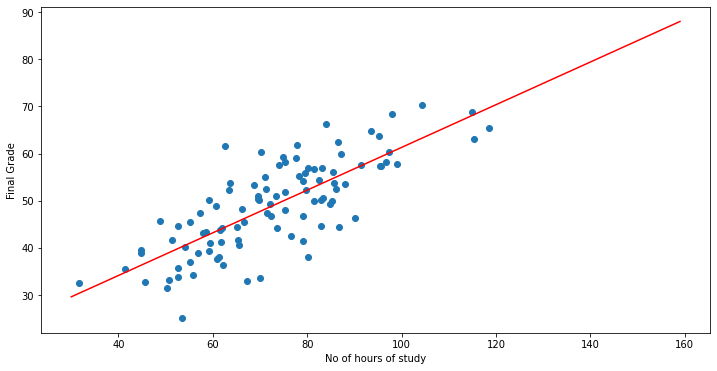

In [39]:
fig = plt.figure(figsize=(12,6))
plt.scatter(gvh.no_of_hours, gvh.grade)
plt.plot(x,y_prediction,'r')
plt.xlabel('No of hours of study')
plt.ylabel('Final Grade')
plt.show()